# Week 6, Social data analysis, DTU, 05.03.2024

## Part 1:

Exercises: Explanatory data visualization. It's OK to use LLMs here if you can.

- What are the three key elements to keep in mind when you design an explanatory visualization?
    1) Start with a quesion
    2) Allow exploration
    3) Know your audience


- In the video I talk about (1) overview first, (2) zoom and filter, (3) details on demand.
- Go online and find a visualization that follows these principles (don't use one from the video).

https://experience.arcgis.com/experience/220fef27d07d438889d651cc2e00076c/page/Covid-19-Regionalt/

- Explain how your video achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.
- Explain in your own words: How is explanatory data analysis different from exploratory data analysis?

Note: Keep your answers to the questions above short and sweet.

## Part 2: Interactive visualizations with Bokeh

JavaScript D3 could be useful, but not this time ... Python Bokeh installed instead: 
[Jupyter Bokeh guide](https://docs.bokeh.org/en/latest/docs/user_guide/output/jupyter.html#jupyter)

We aim to give you a gentle start with Bokeh and I am going to include more example code than usual in the follwing.

- HINT 1: If you're not an experienced Python user, I recommend going to the [official user's guide](https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide) and working through it. Start by clicking "Introduction" in the linked page. That page has a glossary, a section on output methods, stuff on settings, and interfaces that you can scroll through. The next page Basic Plotting where the action is. Spend some time working through that.
- HINT 2: And by "working through it", I mean copy, paste, and run the code in your own notebook.



In [1]:
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook


In [2]:
import bokeh
print(bokeh.__version__)

3.3.4


In [3]:
output_notebook()

Loading BokehJS ...

***Exercise:*** Recreate the results from Week 2 as an interactive visualisation (shown in the gif). To complete the exercise, follow the steps below to create your own version of the dataviz.

- During this entire lecture, as always, we are going to work with the SF Crime Data.
- We will use data for the ***period 2010-2017***.

### Data prep
A key step is to set up the data right. So for this one, we'll be pretty strict about the steps. The workflow is

1. Take the data for the period of 2010-2017 and group it by hour-of-the-day.

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("../files/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

mask = df["Category"].isin(focuscrimes)
df_focused = df[mask]

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df_focused['Date'], format='%m/%d/%Y')

# Filter rows where the year is between 2010 and 2017
df_years = df[df['Date'].dt.year.between(2010, 2017)]
#df_years
len(df_years)

650078

In [6]:
df_hours = pd.to_datetime(df_years["Time"], format='%H:%M').dt.hour
df_hours

df_per_hours = df_hours.value_counts().sort_index()

# divide by the total ammount to get a normalized version
df_per_hour_norm = df_per_hours/len(df_years)
df_per_hour_norm

Time
0     0.045035
1     0.033004
2     0.026792
3     0.017590
4     0.012197
5     0.011220
6     0.015103
7     0.020933
8     0.030349
9     0.033387
10    0.037905
11    0.040651
12    0.050620
13    0.044655
14    0.046390
15    0.051403
16    0.055426
17    0.063391
18    0.072271
19    0.067661
20    0.062105
21    0.055923
22    0.055616
23    0.050375
Name: count, dtype: float64

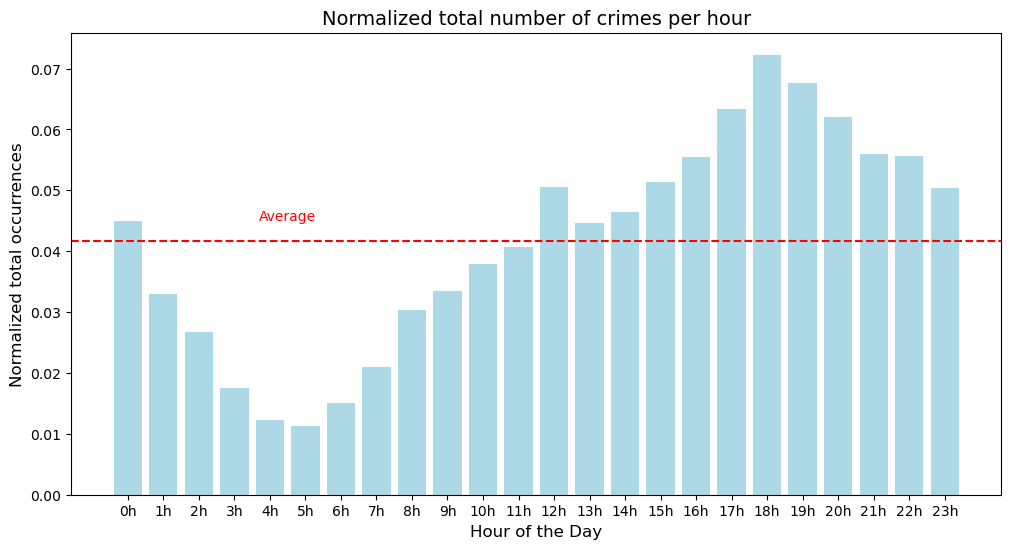

In [7]:
import matplotlib.pyplot as plt

# Assuming df_per_hour is a Pandas Series with the index as hours and values as crime counts

# Create the plot directly with plt
plt.figure(figsize=(12, 6))
plt.bar(df_per_hour_norm.index, df_per_hour_norm, color="lightblue")

# Set plot title and labels
plt.title("Normalized total number of crimes per hour", size=14)
plt.ylabel('Normalized total occurrences', size=12)
plt.xlabel('Hour of the Day', size=12)

# Adjust x-axis labels
plt.xticks(ticks=range(24), labels=[f'{hour}h' for hour in range(24)], size=10, rotation=0)

# Add a red striped horizontal line at the average value
plt.axhline(y=1/24, color='red', linestyle='--', label='Average')
plt.annotate('Average', xy=(4.5, 1/24), xytext=(4.5, 0.045), color='red',
#             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='center')


plt.show()


Figure 1: Normalized occurencies per hour of all crimes, meaning that the total sum of all bars will give 1, and each bar is on average 1/24 = 0.042

2. We would like to be able to easily compare how the distribution of crimes differ from each other, not absolute numbers, so we will work on normalized data:
    - To normalise data for within a crime category you simply have to devide the count for each hour by the total number of this crime type. (To give a concrete example in the ASSAULT category, take the number of assault-counts in 1st hour you should devide by the total number of assaults, then you devide number of assaults in 2nd hour by the total number of assaults and so on)
    - Your life will be easiest if you organize your dataframe as shown in this helpful screenshot.

In [8]:
crime_data_hours = {}

for crime in focuscrimes:
    crime_df = df_years[df_years["Category"] == crime]
    crime_hours = pd.to_datetime(crime_df["Time"], format='%H:%M').dt.hour

    crime_per_hours = crime_hours.value_counts().sort_index()
    crime_data_hours[crime] = crime_per_hours/len(crime_df)

crime_data_hours

{'WEAPON LAWS': Time
 0     0.054413
 1     0.039486
 2     0.032891
 3     0.022737
 4     0.016662
 5     0.007377
 6     0.011542
 7     0.021609
 8     0.024212
 9     0.031849
 10    0.031329
 11    0.033845
 12    0.045561
 13    0.046689
 14    0.043825
 15    0.054413
 16    0.061789
 17    0.061963
 18    0.067864
 19    0.065000
 20    0.054413
 21    0.052851
 22    0.062918
 23    0.054760
 Name: count, dtype: float64,
 'DRUNKENNESS': Time
 0     0.080276
 1     0.077235
 2     0.070140
 3     0.027367
 4     0.014393
 5     0.005068
 6     0.009122
 7     0.020069
 8     0.017231
 9     0.021488
 10    0.022299
 11    0.031826
 12    0.029191
 13    0.029597
 14    0.033043
 15    0.040138
 16    0.044395
 17    0.047638
 18    0.053923
 19    0.050071
 20    0.060815
 21    0.062639
 22    0.075613
 23    0.076424
 Name: count, dtype: float64,
 'VEHICLE THEFT': Time
 0     0.035913
 1     0.024113
 2     0.018234
 3     0.011841
 4     0.010011
 5     0.009991
 6     0.01

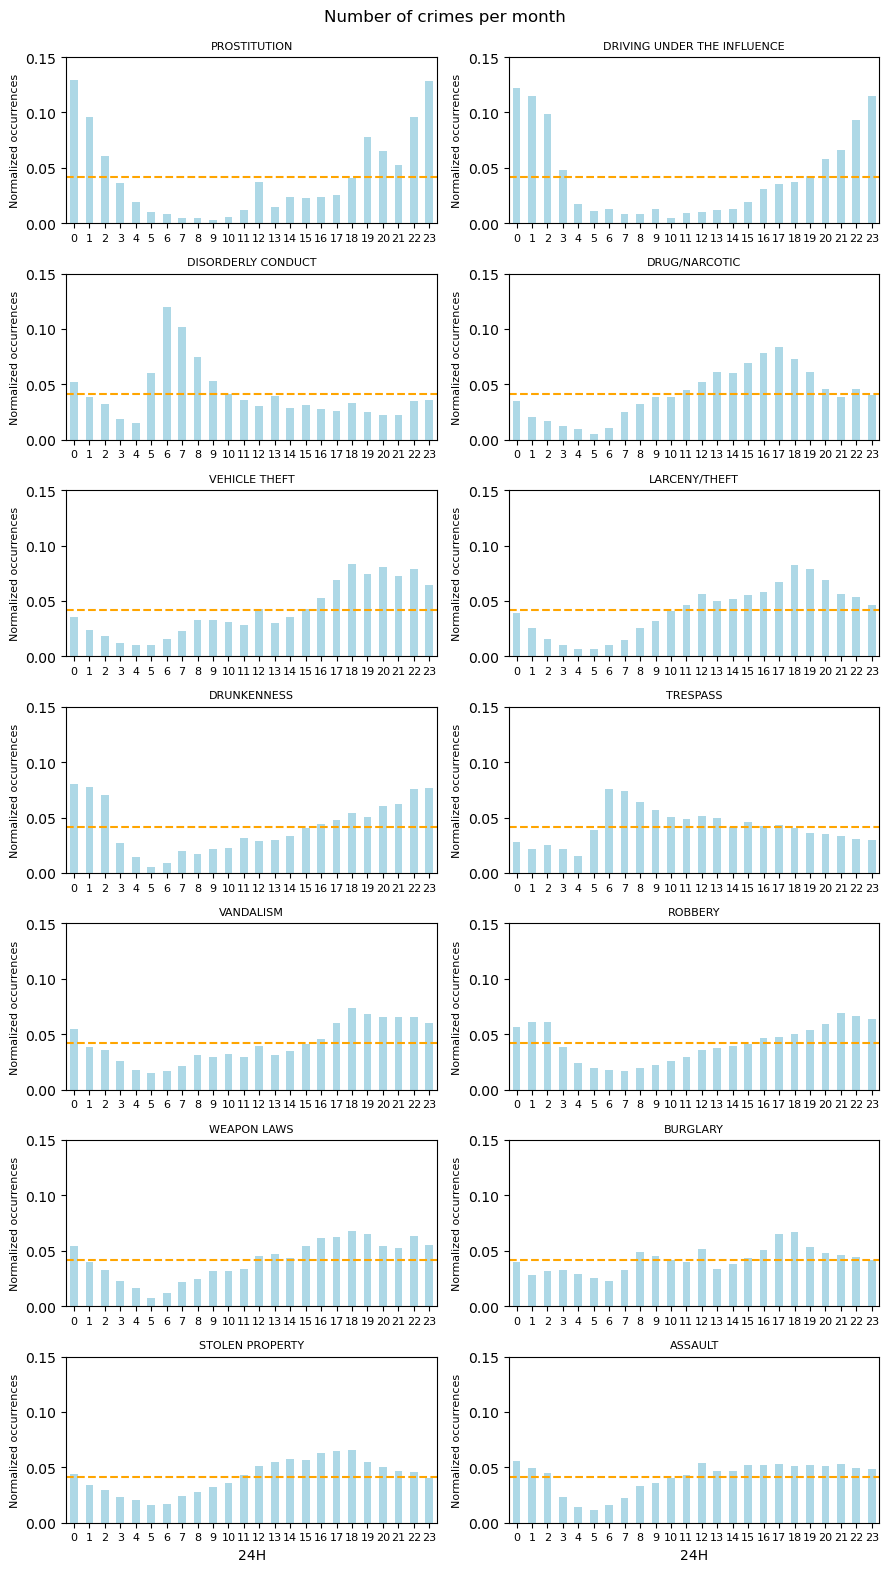

In [9]:
# Calculate max y-value for each dataset
max_y_values = {crime: data.max() for crime, data in crime_data_hours.items()}

# Sort crime categories by max y-value
sorted_crime_data = sorted(crime_data_hours.items(), key=lambda x: max_y_values[x[0]], reverse=True)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(9, 16))
fig.suptitle("Number of crimes per month")

axes = axes.flatten()

for ax, (crime, data) in zip(axes, sorted_crime_data):
    data.plot(kind='bar', ax=ax, color="lightblue")
    ax.set_title(crime, size=8)
    ax.set_ylabel('Normalized occurrences', size=8)
    ax.set_xlabel('24H', size=10, position='bottom')
    ax.set_xticklabels([label.get_text()[0:3] for label in ax.get_xticklabels()], size=8, rotation=0)
    ax.set_ylim([0, 0.15])
    
    # Add a red striped horizontal line at the average value
    ax.axhline(y=1/24, color='orange', linestyle='--', label='Average')
#    ax.annotate('Avg', xy=(6.5, 1/24), xytext=(6.5, 0.045), color='red', size=8, ha='center')


for i, ax in enumerate(axes):
# For all but the last row
    if i < 12:  # 12 is the index of the first plot in the last row (7 * 2 - 2)
#        ax.set_xticklabels([])  # Hide x-axis labels
        ax.set_xlabel('')
    else:
        for label in ax.get_xticklabels():
            label.set_fontsize(8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Figure 2: The normalized 24-hour plots for 14 focused crimes. The striped orange line indicated the average crime number (y = 1/24 of total occurencies for that specific crime). 

Okay, so ... making my life easier by creating the dataframe from the screemshot, that is a dataframe showing normalized occurencies per hour (row) for each focused crime (column):*

In [10]:
df_crime_hours = pd.DataFrame(crime_data_hours)
df_crime_hours

,WEAPON LAWS,DRUNKENNESS,VEHICLE THEFT,TRESPASS,LARCENY/THEFT,BURGLARY,ASSAULT,STOLEN PROPERTY,DRIVING UNDER THE INFLUENCE,VANDALISM,ROBBERY,DISORDERLY CONDUCT,DRUG/NARCOTIC,PROSTITUTION
Time,,,,,,,,,,,,,,
0,0.054413,0.080276,0.035913,0.027969,0.039479,0.040191,0.055468,0.044247,0.121869,0.054945,0.056201,0.052282,0.035064,0.129656
1,0.039486,0.077235,0.024113,0.021191,0.025431,0.027653,0.049745,0.033786,0.114539,0.038576,0.060538,0.038354,0.020654,0.095748
2,0.032891,0.070140,0.018234,0.025391,0.015607,0.031432,0.044837,0.029686,0.098656,0.035994,0.061111,0.032569,0.016746,0.060436
3,0.022737,0.027367,0.011841,0.021382,0.009971,0.032765,0.023267,0.023325,0.047954,0.026022,0.037957,0.018642,0.012489,0.036367
4,0.016662,0.014393,0.010011,0.015559,0.006543,0.029379,0.014025,0.020356,0.017410,0.017797,0.023943,0.014999,0.009279,0.019501
5,0.007377,0.005068,0.009991,0.038851,0.006631,0.025644,0.011857,0.016398,0.010690,0.014670,0.019642,0.060210,0.005284,0.010190
6,0.011542,0.009122,0.015274,0.075601,0.010058,0.022892,0.015573,0.017246,0.012523,0.017059,0.017849,0.119777,0.010982,0.008433
7,0.021609,0.020069,0.022757,0.074360,0.015137,0.032284,0.022212,0.024314,0.008552,0.021645,0.016559,0.101564,0.024759,0.005095
8,0.024212,0.017231,0.032932,0.064147,0.025859,0.048688,0.033324,0.027990,0.008247,0.031377,0.019749,0.074566,0.032400,0.004919


If you've followed these steps, your data should be ready! Take a moment to celebrate. 

*(celebrating, wooo weeee!)*

Below, we follow the Bokeh guide for categorical data. You can either use some kind of LLM support to make it happen, it's OK to go nuts and ask away or you can follow the old-school hints from last year:

First, let's convert our Pandas Dataframe to Bokeh ColumnDataSource:


In [11]:
from bokeh.models import FactorRange, ColumnDataSource

# it is a standard way to convert your df to bokeh
# source = ColumnDataSource(your_processed_dataframe)

source = ColumnDataSource(df_crime_hours)

In [12]:
df_crime_hours


,WEAPON LAWS,DRUNKENNESS,VEHICLE THEFT,TRESPASS,LARCENY/THEFT,BURGLARY,ASSAULT,STOLEN PROPERTY,DRIVING UNDER THE INFLUENCE,VANDALISM,ROBBERY,DISORDERLY CONDUCT,DRUG/NARCOTIC,PROSTITUTION
Time,,,,,,,,,,,,,,
0,0.054413,0.080276,0.035913,0.027969,0.039479,0.040191,0.055468,0.044247,0.121869,0.054945,0.056201,0.052282,0.035064,0.129656
1,0.039486,0.077235,0.024113,0.021191,0.025431,0.027653,0.049745,0.033786,0.114539,0.038576,0.060538,0.038354,0.020654,0.095748
2,0.032891,0.070140,0.018234,0.025391,0.015607,0.031432,0.044837,0.029686,0.098656,0.035994,0.061111,0.032569,0.016746,0.060436
3,0.022737,0.027367,0.011841,0.021382,0.009971,0.032765,0.023267,0.023325,0.047954,0.026022,0.037957,0.018642,0.012489,0.036367
4,0.016662,0.014393,0.010011,0.015559,0.006543,0.029379,0.014025,0.020356,0.017410,0.017797,0.023943,0.014999,0.009279,0.019501
5,0.007377,0.005068,0.009991,0.038851,0.006631,0.025644,0.011857,0.016398,0.010690,0.014670,0.019642,0.060210,0.005284,0.010190
6,0.011542,0.009122,0.015274,0.075601,0.010058,0.022892,0.015573,0.017246,0.012523,0.017059,0.017849,0.119777,0.010982,0.008433
7,0.021609,0.020069,0.022757,0.074360,0.015137,0.032284,0.022212,0.024314,0.008552,0.021645,0.016559,0.101564,0.024759,0.005095
8,0.024212,0.017231,0.032932,0.064147,0.025859,0.048688,0.033324,0.027990,0.008247,0.031377,0.019749,0.074566,0.032400,0.004919


In [13]:
print(source.column_names)


['Time', 'WEAPON LAWS', 'DRUNKENNESS', 'VEHICLE THEFT', 'TRESPASS', 'LARCENY/THEFT', 'BURGLARY', 'ASSAULT', 'STOLEN PROPERTY', 'DRIVING UNDER THE INFLUENCE', 'VANDALISM', 'ROBBERY', 'DISORDERLY CONDUCT', 'DRUG/NARCOTIC', 'PROSTITUTION']


2. We also need to create an empty figure (we will add our stuff here later on). Mini sub-exercise: Find the a guide how to define a figure in Bokeh online. Here is a little help
3. Now we are going to add the bars. In order to do so, we will use vbar (see the guide for help)
4. The last thing to do is to make your legend interactive and display the figure


In [14]:
# p is a standard way to call figures in Bokeh
# make sure to add x_range. In my case hours is a list on the form ['1', '2', '3' ... , '24']
hours = [str(i) for i in range(0, 24)]

# read up on the FactorRange in the guide
# do not forget to add other attributes to the figure, e.g. title, axis names and so on

#p = figure(...., x_range = FactorRange(factors=hours), ...) 

In [15]:
focuscrimes

{'ASSAULT',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'LARCENY/THEFT',
 'PROSTITUTION',
 'ROBBERY',
 'STOLEN PROPERTY',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WEAPON LAWS'}

In [16]:
from bokeh.palettes import Viridis256  # Import a palette
from bokeh.transform import factor_cmap

colors = Viridis256[:len(focuscrimes)]  # Select as many colors as focus crimes

# Create a figure
p = figure(title="Normalized Crime Data by Hour",
            x_axis_label="Hour of the Day",
            y_axis_label="Normalized Crime Count",
            x_range=FactorRange(factors = hours), # Ensure hours are strings
            height=450, width=900)

# Add renderers like p.vbar(), p.line(), etc., depending on your data
# Example for a bar chart:
#p.vbar(x='Time', top='VEHICLE THEFT', width=0.9, source=source)

bar = {} # to store vbars

# here we will do a for loop:
for indx, (crime, color) in enumerate(zip(focuscrimes, colors)):
    bar[crime] = p.vbar(x='Time',  top=crime, source= source, color=color,
                    ### we will create a vbar for each focuscrime
                    legend_label=crime, width=0.9, muted_alpha=0.1, alpha=0.8)
    
    
#i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
#read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)

p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
show(p) #displays your plot


In [17]:
from bokeh.palettes import Category20

colors = Category20[20][:len(focuscrimes)]  # Adjust the number as per the focus crimes count

# Create a figure
p = figure(title="Normalized Crime Data by Hour",
            x_axis_label="Hour of the Day",
            y_axis_label="Normalized Crime Count",
            x_range=FactorRange(factors = hours), # Ensure hours are strings
            height=450, width=900)

# Add renderers like p.vbar(), p.line(), etc., depending on your data
# Example for a bar chart:
#p.vbar(x='Time', top='VEHICLE THEFT', width=0.9, source=source)

bar = {} # to store vbars

# here we will do a for loop:
for indx, (crime, color) in enumerate(zip(focuscrimes, colors)):
    bar[crime] = p.vbar(x='Time',  top=crime, source= source, color=color,
                    ### we will create a vbar for each focuscrime
                    legend_label=crime, width=0.9, muted_alpha=0.1, alpha=0.8)
    
    
#i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
#read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)

p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
show(p) #displays your plot


## Part 3: Narrative Dataviz
Let's finish up with some reading

Reading: [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf) by Edward Segel and Jeffrey Heer. We'll read section 1-3 today. (And the rest a bit later).

When you get to section 3 it's fun to open up the examples mentioned by the authors in a browser and explore them as you read the text.
